In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create table for missing data
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    return missing_data

In [3]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [4]:
# Import dataset
df = pd.read_csv('bike_buyers.csv')
df_raw = df.copy()

In [5]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [6]:
# Analyze missing data
draw_missing_data_table(df)

,Total,Percent
Gender,11,1.1
Cars,9,0.9
Children,8,0.8
Age,8,0.8
Marital Status,7,0.7
Income,6,0.6
Home Owner,4,0.4
ID,0,0.0
Education,0,0.0
Occupation,0,0.0


In [7]:
# Delete observation without gender
df.drop(df[pd.isnull(df['Gender'])].index, inplace = True)

# Delete observation without cars
df.drop(df[pd.isnull(df['Cars'])].index, inplace = True)

# Delete observation without children
df.drop(df[pd.isnull(df['Children'])].index, inplace = True)

# Delete observation without marital status
df.drop(df[pd.isnull(df['Marital Status'])].index, inplace = True)

# Delete observation without home owner
df.drop(df[pd.isnull(df['Home Owner'])].index, inplace = True)

In [8]:
age_means = df.groupby('Marital Status')['Age'].mean()

# Means income per region
income_means = df.groupby('Region')['Income'].mean()

In [9]:
# Transform age_means into a dictionary
map_age_means = age_means.to_dict()

# Transform income_means income into a dictionary
map_income_means = income_means.to_dict()

In [10]:
# Impute age based on marital status
idx_nan_age = df.loc[pd.isnull(df['Age'])].index
df.loc[idx_nan_age, 'Age'] = df['Marital Status'].loc[idx_nan_age].map(map_age_means)

# Impute income based on region
idx_nan_income = df.loc[pd.isnull(df['Income'])].index
df.loc[idx_nan_income, 'Income'] = df['Region'].loc[idx_nan_income].map(map_income_means)

In [11]:
idx_nan_age

Int64Index([9, 225, 371, 554, 770, 986], dtype='int64')

In [12]:
df['Purchased Bike'] = df['Purchased Bike'].map({'Yes' : 1.0, 'No' : 0.0})

<AxesSubplot: xlabel='Marital Status', ylabel='Purchased Bike'>

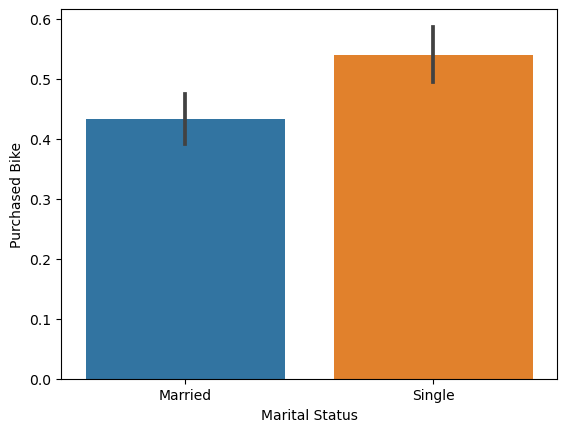

In [14]:
df['Marital Status'] = pd.Categorical(df['Marital Status'])

# Plot 
sns.barplot(x = 'Marital Status', y = 'Purchased Bike', data = df)

<AxesSubplot: xlabel='Gender', ylabel='Purchased Bike'>

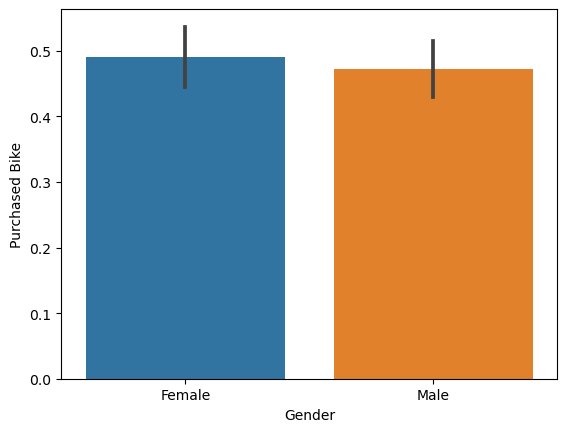

In [15]:
sns.barplot(x = 'Gender', y = 'Purchased Bike', data = df)

<AxesSubplot: xlabel='Children', ylabel='Purchased Bike'>

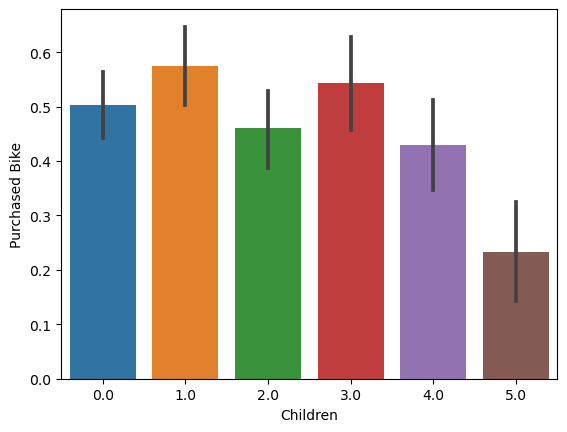

In [17]:
sns.barplot(x = 'Children', y = 'Purchased Bike', data = df)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Skilled Manual'),
  Text(1, 0, 'Clerical'),
  Text(2, 0, 'Professional'),
  Text(3, 0, 'Manual'),
  Text(4, 0, 'Management')])

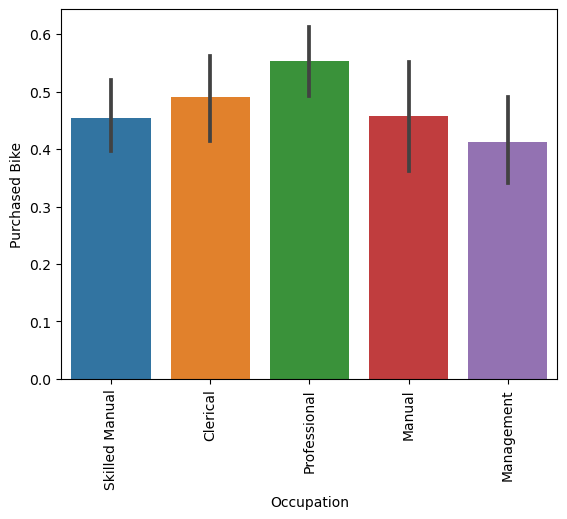

In [18]:
sns.barplot(x = 'Occupation', y = 'Purchased Bike', data = df)
plt.xticks(rotation = 90)

<AxesSubplot: xlabel='Home Owner', ylabel='Purchased Bike'>

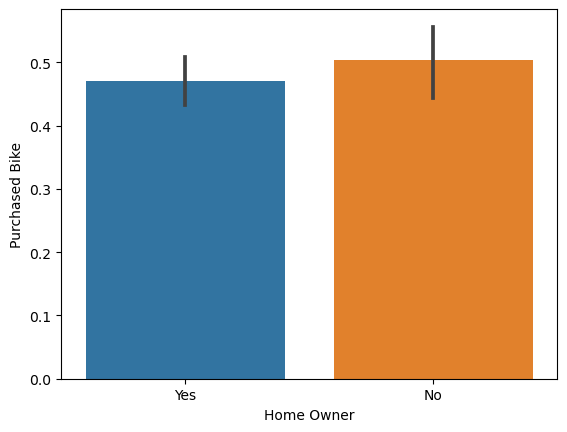

In [19]:
sns.barplot(x = 'Home Owner', y = 'Purchased Bike', data = df)

In [20]:
# Drop unnecessary columns
df.drop('ID', axis = 1, inplace = True)
df.drop('Gender', axis = 1, inplace = True)
df.drop('Home Owner', axis = 1, inplace = True)

In [21]:
df.dtypes


Marital Status      category
Income               float64
Children             float64
Education             object
Occupation            object
Cars                 float64
Commute Distance      object
Region                object
Age                  float64
Purchased Bike       float64
dtype: object

In [22]:
# Change object types into categorical
df['Education'] = pd.Categorical(df['Education'])
df['Occupation'] = pd.Categorical(df['Occupation'])
df['Commute Distance'] = pd.Categorical(df['Commute Distance'])
df['Region'] = pd.Categorical(df['Region'])